In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings

# Optional: Suppress warnings
warnings.filterwarnings('ignore')



In [6]:
df=pd.read_csv('updated_floods .csv')
print(df)

       Year    City       Flood_Area  Latitude  Longitude  MonsoonIntensity  \
0      2022  Mumbai        Kandivali   19.2047    72.8526                 3   
1      2021  Mumbai          Dahisar   19.2578    72.8591                 8   
2      2017  Mumbai            Vashi   19.0771    72.9986                 3   
3      2022  Mumbai           Kalyan   19.2437    73.1355                 4   
4      2012  Mumbai      Lokhandwala   19.1401    72.8327                 3   
...     ...     ...              ...       ...        ...               ...   
49995  2012  Mumbai       Walkeshwar   18.9536    72.7963                 3   
49996  2018  Mumbai       Vile Parle   19.1013    72.8437                 3   
49997  2021  Mumbai  Vile Parle East   19.0998    72.8535                 4   
49998  2021  Mumbai         Mankhurd   19.0507    72.9363                 4   
49999  2015  Mumbai            Powai   19.1171    72.9050                 4   

       TopographyDrainage  RiverManagement  Defores

In [7]:
df.columns

Index(['Year', 'City', 'Flood_Area', 'Latitude', 'Longitude',
       'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [8]:
df_forcast=df[['Year','Flood_Area','MonsoonIntensity', 'Deforestation', 
    'ClimateChange', 'Siltation', 'AgriculturalPractices', 
    'DrainageSystems', 'CoastalVulnerability', 'Landslides', 
    'PopulationScore', 'InadequatePlanning']]
df_forcast.head()

,Year,Flood_Area,MonsoonIntensity,Deforestation,ClimateChange,Siltation,AgriculturalPractices,DrainageSystems,CoastalVulnerability,Landslides,PopulationScore,InadequatePlanning
0,2022,Kandivali,3,6,4,2,3,10,7,4,4,2
1,2021,Dahisar,8,7,9,5,5,9,2,6,1,1
2,2017,Vashi,3,1,5,7,4,7,4,4,1,3
3,2022,Kalyan,4,7,4,4,6,4,2,6,8,6
4,2012,Lokhandwala,3,2,8,2,7,7,6,5,4,3


In [20]:
!pip install pandas
!pip install plotly





In [22]:
pip install jupyter-dash


   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.5 MB 8.5 MB/s eta 0:00:01
   ----------- ---------------------------- 2.1/7.5 MB 5.6 MB/s eta 0:00:01
   --------------------- ------------------ 3.9/7.5 MB 7.1 MB/s eta 0:00:01
   ----------------------------- ---------- 5.5/7.5 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------  7.3/7.5 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 7.5/7.5 MB 6.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas as pd
from dash import dcc, html, Input, Output
import plotly.express as px
from dash import Dash  # Import Dash directly

# Sample data creation (replace this with your actual data loading code)
data = {
    'Year': [2020, 2021, 2022, 2023],
    'MonsoonIntensity': [80, 85, 78, 90],
    'Deforestation': [5, 7, 6, 8],
    'ClimateChange': [2, 3, 2, 4],
    'Siltation': [1, 2, 1, 2],
    'AgriculturalPractices': [4, 5, 4, 6],
    'DrainageSystems': [3, 3, 4, 5],
    'CoastalVulnerability': [6, 7, 6, 8],
    'Landslides': [2, 3, 2, 4],
    'PopulationScore': [100, 110, 105, 115],
    'InadequatePlanning': [4, 5, 4, 6]
}

df = pd.DataFrame(data)

app = Dash(__name__)

app.layout = html.Div([
    html.H1("Weather Forecast Analysis Dashboard"),
    
    html.Label("Select Weather Feature:"),
    dcc.Dropdown(
        id='feature-selector',
        options=[
            {'label': 'Monsoon Intensity', 'value': 'MonsoonIntensity'},
            {'label': 'Deforestation', 'value': 'Deforestation'},
            {'label': 'Climate Change', 'value': 'ClimateChange'},
            {'label': 'Siltation', 'value': 'Siltation'},
            {'label': 'Agricultural Practices', 'value': 'AgriculturalPractices'},
            {'label': 'Drainage Systems', 'value': 'DrainageSystems'},
            {'label': 'Coastal Vulnerability', 'value': 'CoastalVulnerability'},
            {'label': 'Landslides', 'value': 'Landslides'},
            {'label': 'Population Score', 'value': 'PopulationScore'},
            {'label': 'Inadequate Planning', 'value': 'InadequatePlanning'}
        ],
        value='MonsoonIntensity'
    ),
    
    dcc.Graph(id='feature-chart'),
])

@app.callback(
    Output('feature-chart', 'figure'),
    [Input('feature-selector', 'value')]
)
def update_chart(selected_feature):
    fig = px.line(df, x='Year', y=selected_feature,
                  title=f'{selected_feature} Over Time')
    fig.update_layout(
        xaxis=dict(
            tickmode='array',
            tickvals=df['Year'],  # Ensure ticks correspond to years in the dataset
            ticktext=[str(year) for year in df['Year']]  # Display years as integers
        )
    )
    return fig

if __name__ == '__main__':
    app.run_server(port=8050, debug=True)


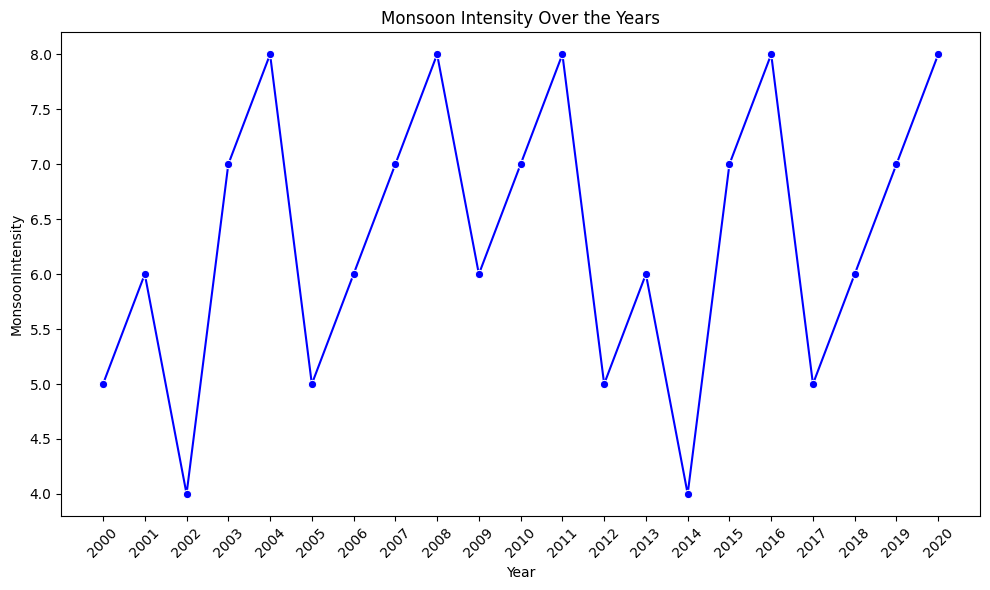

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the dataset manually
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'MonsoonIntensity': [5, 6, 4, 7, 8, 5, 6, 7, 8, 6, 7, 8, 5, 6, 4, 7, 8, 5, 6, 7, 8],
    # Other columns omitted for brevity
})

# Create a figure for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot 1: Line plot for Monsoon Intensity over the years
sns.lineplot(data=data, x='Year', y='MonsoonIntensity', marker='o', color='blue', ax=ax)
ax.set_title('Monsoon Intensity Over the Years')
ax.set_xticks(data['Year'])  # Set x-ticks to only whole years
ax.set_xticklabels([str(year) for year in data['Year']], rotation=45)  # Rotate x-tick labels for readability

# Show the plot
plt.tight_layout()
plt.show()


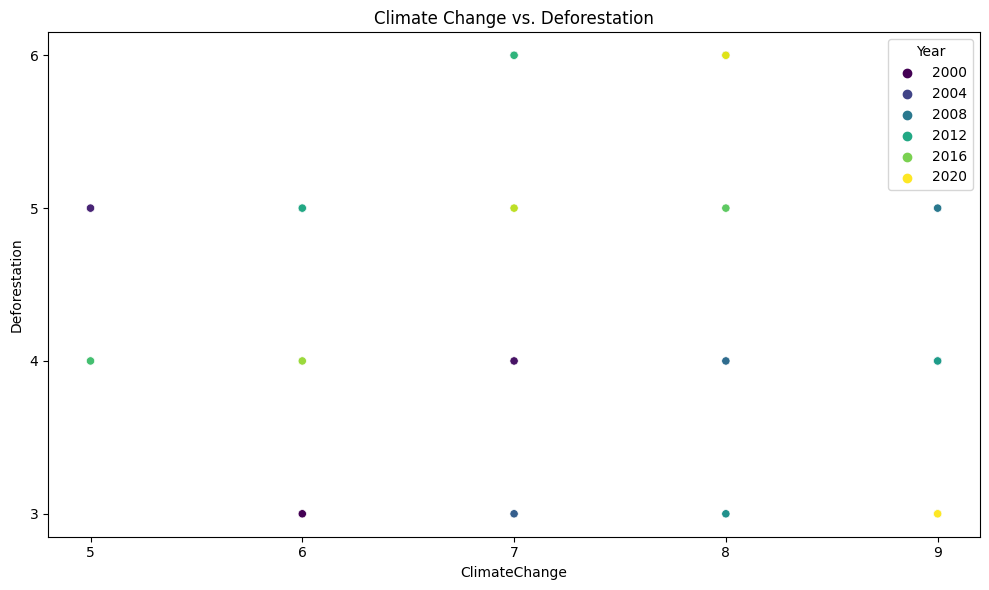

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the dataset manually
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'ClimateChange': [6, 7, 5, 8, 9, 6, 7, 8, 9, 7, 8, 9, 6, 7, 5, 8, 9, 6, 7, 8, 9],
    'Deforestation': [3, 4, 5, 6, 4, 5, 3, 4, 5, 6, 3, 4, 5, 6, 4, 5, 3, 4, 5, 6, 3],
    # Other columns omitted for brevity
})

# Create a figure for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot 2: Scatter plot for Climate Change vs. Deforestation
sns.scatterplot(data=data, x='ClimateChange', y='Deforestation', hue='Year', palette='viridis', ax=ax)
ax.set_title('Climate Change vs. Deforestation')
ax.set_xticks(sorted(data['ClimateChange'].unique()))  # Set x-ticks to unique values
ax.set_yticks(sorted(data['Deforestation'].unique()))  # Set y-ticks to unique values

# Show the plot
plt.tight_layout()
plt.show()


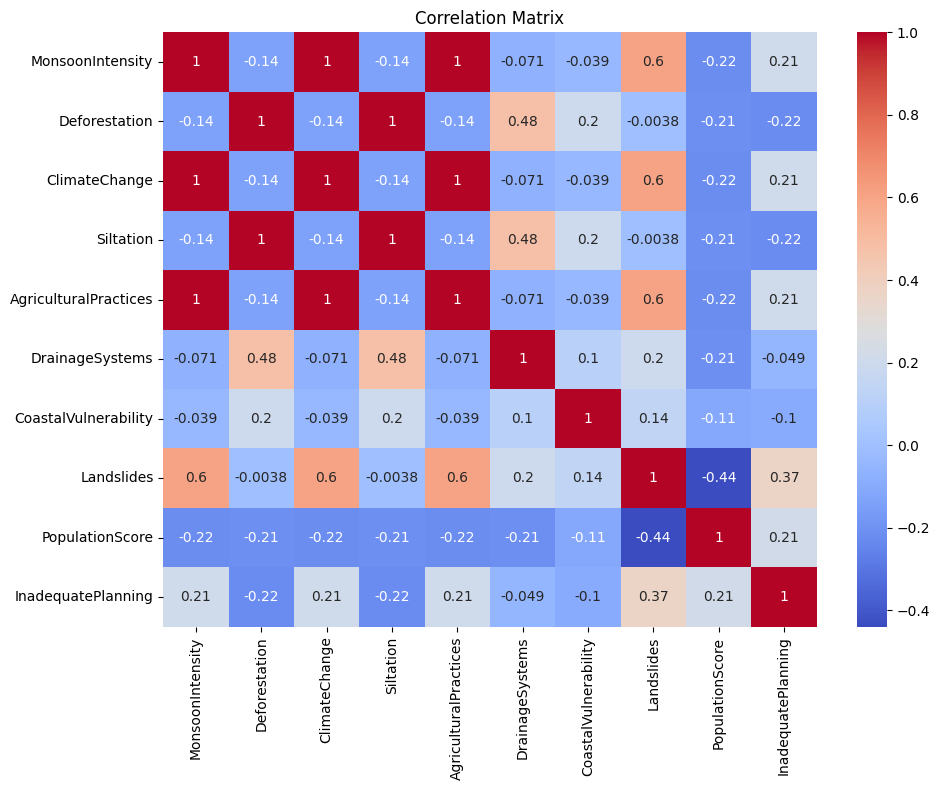

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the dataset manually
data = pd.DataFrame({
    'MonsoonIntensity': [5, 6, 4, 7, 8, 5, 6, 7, 8, 6, 7, 8, 5, 6, 4, 7, 8, 5, 6, 7, 8],
    'Deforestation': [3, 4, 5, 6, 4, 5, 3, 4, 5, 6, 3, 4, 5, 6, 4, 5, 3, 4, 5, 6, 3],
    'ClimateChange': [6, 7, 5, 8, 9, 6, 7, 8, 9, 7, 8, 9, 6, 7, 5, 8, 9, 6, 7, 8, 9],
    'Siltation': [2, 3, 4, 5, 3, 4, 2, 3, 4, 5, 2, 3, 4, 5, 3, 4, 2, 3, 4, 5, 2],
    'AgriculturalPractices': [4, 5, 3, 6, 7, 4, 5, 6, 7, 5, 6, 7, 4, 5, 3, 6, 7, 4, 5, 6, 7],
    'DrainageSystems': [7, 8, 6, 9, 7, 8, 7, 8, 6, 9, 7, 8, 6, 9, 7, 8, 6, 9, 7, 8, 6],
    'CoastalVulnerability': [5, 4, 6, 7, 5, 6, 5, 4, 6, 7, 5, 6, 5, 4, 6, 7, 5, 6, 5, 4, 6],
    'Landslides': [12, 15, 10, 20, 18, 13, 16, 14, 17, 19, 21, 23, 14, 15, 17, 16, 18, 19, 20, 22, 21],
    'PopulationScore': [6, 7, 8, 5, 6, 7, 8, 9, 7, 6, 8, 5, 6, 7, 8, 9, 7, 6, 8, 5, 6],
    'InadequatePlanning': [3, 4, 2, 5, 4, 3, 5, 4, 3, 2, 5, 4, 3, 2, 5, 4, 3, 2, 5, 4, 3]
})

# Create a figure for the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot 3: Heatmap of correlations between different factors
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Matrix')

# Show the plot
plt.tight_layout()
plt.show()


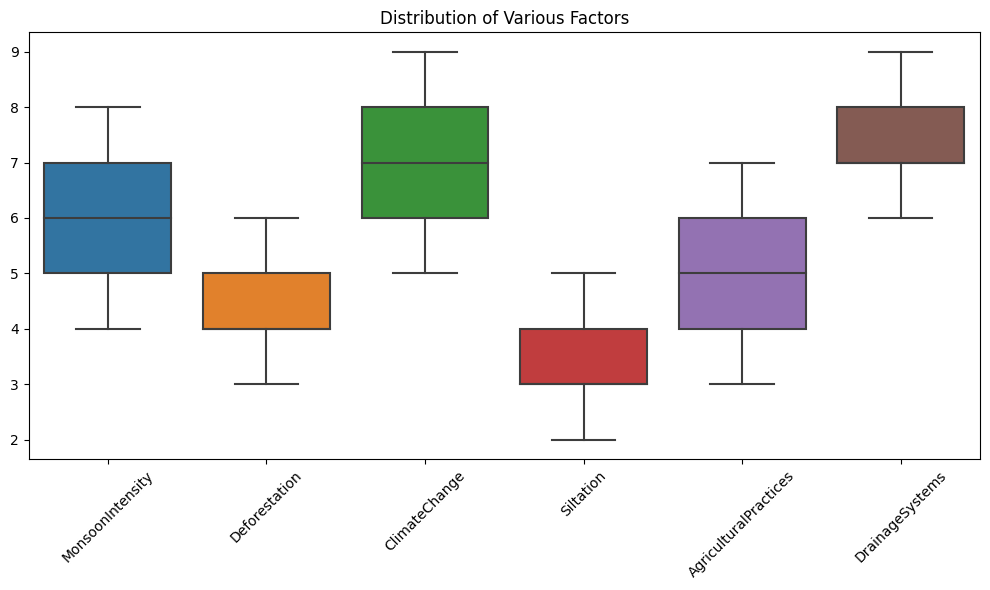

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the dataset manually
data = pd.DataFrame({
    'MonsoonIntensity': [5, 6, 4, 7, 8, 5, 6, 7, 8, 6, 7, 8, 5, 6, 4, 7, 8, 5, 6, 7, 8],
    'Deforestation': [3, 4, 5, 6, 4, 5, 3, 4, 5, 6, 3, 4, 5, 6, 4, 5, 3, 4, 5, 6, 3],
    'ClimateChange': [6, 7, 5, 8, 9, 6, 7, 8, 9, 7, 8, 9, 6, 7, 5, 8, 9, 6, 7, 8, 9],
    'Siltation': [2, 3, 4, 5, 3, 4, 2, 3, 4, 5, 2, 3, 4, 5, 3, 4, 2, 3, 4, 5, 2],
    'AgriculturalPractices': [4, 5, 3, 6, 7, 4, 5, 6, 7, 5, 6, 7, 4, 5, 3, 6, 7, 4, 5, 6, 7],
    'DrainageSystems': [7, 8, 6, 9, 7, 8, 7, 8, 6, 9, 7, 8, 6, 9, 7, 8, 6, 9, 7, 8, 6]
})

# Create a figure for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot 4: Box plot for different factors affecting floods
sns.boxplot(data=data[['MonsoonIntensity', 'Deforestation', 'ClimateChange', 'Siltation', 
                       'AgriculturalPractices', 'DrainageSystems']], ax=ax)
ax.set_title('Distribution of Various Factors')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-tick labels for readability

# Show the plot
plt.tight_layout()
plt.show()


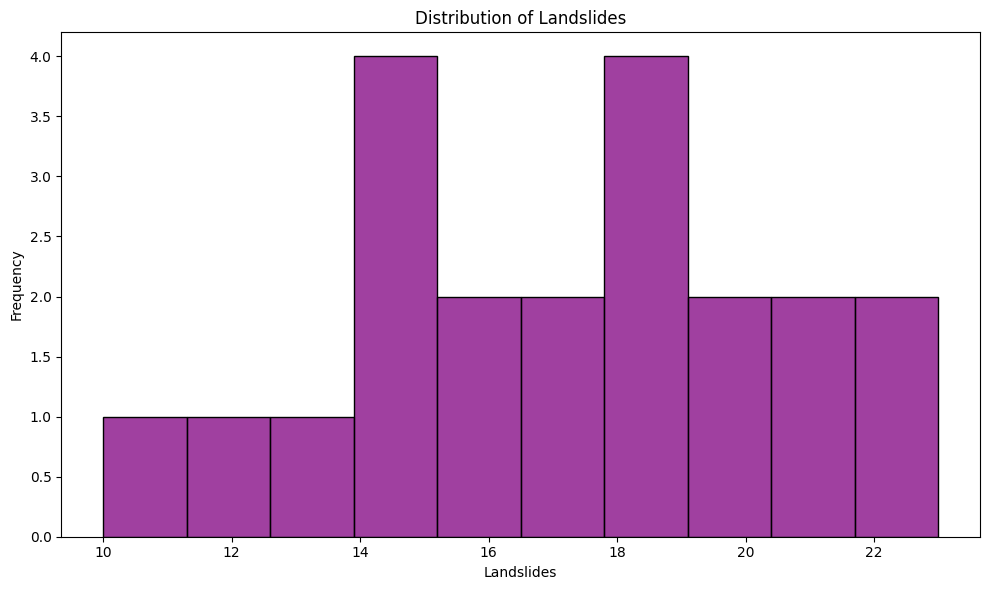

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the dataset manually
data = pd.DataFrame({
    'Landslides': [12, 15, 10, 20, 18, 13, 16, 14, 17, 19, 21, 23, 14, 15, 17, 16, 18, 19, 20, 22, 21],
    # Other columns omitted for brevity
})

# Create a figure for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot 6: Histogram of Landslides
sns.histplot(data['Landslides'], bins=10, color='purple', ax=ax)
ax.set_title('Distribution of Landslides')
ax.set_xlabel('Landslides')
ax.set_ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()


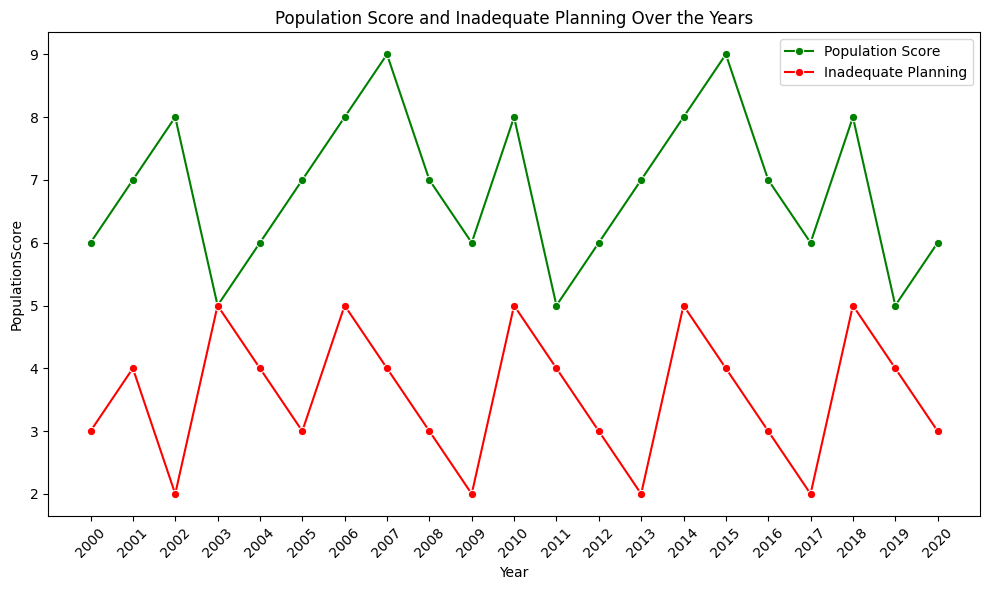

In [44]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the dataset manually
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'PopulationScore': [6, 7, 8, 5, 6, 7, 8, 9, 7, 6, 8, 5, 6, 7, 8, 9, 7, 6, 8, 5, 6],
    'InadequatePlanning': [3, 4, 2, 5, 4, 3, 5, 4, 3, 2, 5, 4, 3, 2, 5, 4, 3, 2, 5, 4, 3],
    # Other columns omitted for brevity
})

# Create a figure for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot 5: Line plot for Population Score and Inadequate Planning
sns.lineplot(data=data, x='Year', y='PopulationScore', marker='o', color='green', ax=ax, label='Population Score')
sns.lineplot(data=data, x='Year', y='InadequatePlanning', marker='o', color='red', ax=ax, label='Inadequate Planning')
ax.set_title('Population Score and Inadequate Planning Over the Years')
ax.set_xticks(data['Year'])  # Set x-ticks to only whole years
ax.set_xticklabels([str(year) for year in data['Year']], rotation=45)  # Rotate x-tick labels for readability
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()
